#### 2023/11/20 画像の類似度を判定するプログラム

In [1]:
import cv2
import pandas as pd
import glob
import requests
import numpy as np

In [4]:
asai_target_info = pd.read_excel('../data/asai_target_info.xlsx', index_col=0)

In [5]:
# 浅井のプログラムで作成したグラフを保存
# ストロークの太さは 5, 6, 7px あたりがよさそう
# from preprocess_data_over943_plusinfo import PreprocessDataOver943PlusInfo

# folder_name_plot_rotate = '../temp/20231120_drawingimg_plot_rotate_large_6px'

# drawing_id_start = len(asai_target_info) - 1
# drawing_id_end = len(asai_target_info)
# df_info_year = asai_target_info[drawing_id_start:drawing_id_end]

# for url, rotate_type, drawing_id in zip(df_info_year['url'], df_info_year['rotate_type'], df_info_year['drawing_id']):
#     data = PreprocessDataOver943PlusInfo(url, rotate_type)
#     file_name = f'{folder_name_plot_rotate}/drawing_id_{drawing_id}.jpg'
#     data.draw_allstroke(file_name, 6)
#     print(file_name)

##### ▶ビューワのオリジナルサイズの画像を保存

In [6]:
# ビューワ上にある各ドローイング画像のURLから取ってきた画像を保存(もとの大きさ)
# folder_name_viewer_notrotate_original = '20231120_drawingimg_viewer_notrotate_original'

# for img_url, drawing_id in zip(asai_target_info['img_url'], asai_target_info['drawing_id']):
#     # img_urlから、@@images以下を削除して、「@@images/thumbnail」をくっつける
#     slice = img_url.find('@@images')
#     stroke_info_url = img_url[:slice]
#     org_img_url = stroke_info_url + '@@images/thumbnail'
#     response = requests.get(org_img_url, auth=('19t2003a', 'ireneRED77'))
#     content = response.content    
#     file_name = f'../temp/{folder_name_viewer_notrotate_original}/drawing_id_{drawing_id}.jpg'
#     print(file_name)
#     with open(file_name, 'wb') as f:
#         f.write(content)

##### ▶ビューワのオリジナルサイズの画像を回転させて保存

In [7]:
# 画像を回転させる関数
# def rotate_img(img, rotate_type):
#     if rotate_type == 180:
#         img_rotate = img
#     elif rotate_type == 270:
#         img_rotate = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
#     elif rotate_type == 0:
#         img_rotate = cv2.rotate(img, cv2.ROTATE_180)
#     elif rotate_type == 90:
#         img_rotate = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
#     return img_rotate

# # ドローイングプロセスビューワでの画像を回転角分だけ回転させて保存する
# folder_name_viewer_rotate_original = '20231120_drawingimg_viewer_rotate_inverse'

# for drawing_id, rotate_type in zip(asai_target_info['drawing_id'], asai_target_info['rotate_type']):
#     file_name = f'../temp/{folder_name_viewer_rotate_original}/drawing_id_{drawing_id}.jpg'
#     img = cv2.imread(f'../temp/20231120_drawingimg_viewer_notrotate_original/drawing_id_{drawing_id}.jpg')
#     img_rotate = rotate_img(img, rotate_type)
#     cv2.imwrite(file_name, img_rotate)
#     print(file_name)

##### ▶matplotlibでの描画結果画像のサイズを直して保存

In [8]:
# # matplotlibでの描画結果のサイズ
# img_plot = cv2.imread(f'../temp/20231110_drawingimg_plot_rotate/drawing_id_{drawing_id}.jpg')
# print('matplotlib: ', img_plot.shape)
# # ビューワからのオリジナルサイズの画像のサイズ
# img_viewer = cv2.imread(f'../temp/20231120_drawingimg_viewer_rotate_original/drawing_id_{drawing_id}.jpg')
# print('viewer    :', img_viewer.shape)

##### ▶画像の類似度の判定

In [6]:
# import imgsim
# df_asai_target = pd.read_excel('../data/asai_target_info.xlsx', index_col=0)
# vtr = imgsim.Vectorizer()
# img_similarity = []

# for drawing_id in df_asai_target['drawing_id']:
#     file_name_plot = f'../temp/20231120_drawingimg_plot_rotate_large_6px/drawing_id_{drawing_id}.jpg'
#     file_name_viewer = f'../temp/20231120_drawingimg_viewer_rotate_original/drawing_id_{drawing_id}.jpg'


#     img_plot = cv2.imread(file_name_plot)
#     img_viewer = cv2.imread(file_name_viewer)
    
#     ret, img_plot_bin = cv2.threshold(img_plot, 0, 255, cv2.THRESH_BINARY)
#     ret, img_viewer_bin = cv2.threshold(img_viewer, 0, 255, cv2.THRESH_BINARY)
    
#     img_plot_vec = vtr.vectorize(img_plot)
#     img_viewer_vec = vtr.vectorize(img_viewer)
    
#     dist = imgsim.distance(img_plot_vec, img_viewer_vec)
#     img_similarity.append(dist)
#     print(drawing_id)

# df_similarity = pd.DataFrame({'drawing_id': df_asai_target['drawing_id'][:50],
#                               'img_similarity': img_similarity})


In [15]:
# df_similarity.to_excel('../temp/img_similarity_plot6px_vs_viewerorg_bin100.xlsx')

In [11]:
df_asai_target = pd.read_excel('../data/asai_target_info.xlsx', index_col=0)
img_similarity = []

for drawing_id in df_asai_target['drawing_id']:

    file_name_plot = f'../temp/20231120_drawingimg_plot_rotate_large_6px/drawing_id_{drawing_id}.jpg'
    file_name_viewer = f'../temp/20231120_drawingimg_viewer_rotate_original/drawing_id_{drawing_id}.jpg'
    img_plot = cv2.imread(file_name_plot)
    img_viewer = cv2.imread(file_name_viewer)
    ret, img_plot_bin = cv2.threshold(img_plot, 250, 255, cv2.THRESH_BINARY)
    ret, img_viewer_bin = cv2.threshold(img_viewer, 250, 255, cv2.THRESH_BINARY)
    # cv2.imshow('image', img_viewer_bin)
    # cv2.waitKey()
    
    same_px_cnt = np.count_nonzero(img_plot_bin == img_viewer_bin) // 3
    print(same_px_cnt)
    img_similarity.append(same_px_cnt)

df_similarity = pd.DataFrame({'drawing_id': df_asai_target['drawing_id'],
                              ''
                              'img_similarity': img_similarity})
df_similarity.to_excel('../temp/imgsimilarity_binalize250.xlsx')

In [ ]:
# 1400 × 990 = 1,386,000

##### 高さ：990 幅：1400 色：3

In [35]:
drawing_id = 0
file_name_plot = f'../temp/20231120_drawingimg_viewer_rotate_original/drawing_id_{drawing_id}.jpg'
img_plot = cv2.imread(file_name_plot)
ret, img_plot_bin = cv2.threshold(img_plot, 100, 255, cv2.THRESH_BINARY)
# cv2.imshow('image', img_plot_bin)
# cv2.waitKey()

print(img_plot[:, 0].shape) # 0列目を取り出す
print(img_plot[0, :].shape) # 0行目を取り出す

(990, 3)
(1400, 3)


##### ▶マス目一つ一つの輝度(R, G, B)の値がどれか一つでも255未満なら、そのマス目を1にする

In [61]:
black_canvas = np.zeros((990, 1400))

for x, row in enumerate(img_plot):
    for y, cell in enumerate(row):
        if cell[0] == 255 and cell[1] == 255 and cell[2] == 255:
            black_canvas[x, y] = 255
        else:
            black_canvas[x, y] = 0
            
cv2.imshow('image', black_canvas)
cv2.waitKey()

-1

In [15]:
df_asai_target = pd.read_excel('../data/asai_target_info.xlsx', index_col=0)
same_px_cnts = []

for drawing_id in df_asai_target['drawing_id']:

    file_name_plot = f'../temp/20231120_drawingimg_viewer_rotate_original/drawing_id_{drawing_id}.jpg'
    file_name_viewer = f'../temp/20231120_drawingimg_viewer_rotate_inverse/drawing_id_{drawing_id}.jpg'
    img_plot = cv2.imread(file_name_plot)
    img_viewer = cv2.imread(file_name_viewer)
    ret, img_plot_bin = cv2.threshold(img_plot, 254, 255, cv2.THRESH_BINARY)
    ret, img_viewer_bin = cv2.threshold(img_viewer, 254, 255, cv2.THRESH_BINARY)
    cv2.imshow('image', img_plot_bin)
    cv2.waitKey()
    
    same_px_cnt = np.count_nonzero(img_plot_bin == img_viewer_bin) // 3
    print(same_px_cnt)
    same_px_cnts.append(same_px_cnt)

df_similarity = pd.DataFrame({'drawing_id': df_asai_target['drawing_id'],
                              'rotate_type': df_asai_target['rotate_type'],
                              'same_px_cnt': same_px_cnts
                              })
# df_similarity.to_excel('../temp/imgsimilarity_viewer_vs_viewerinverse.xlsx')

888822
975804
1290670
1035706
1194361
1117316
1145376
1151655
1124557
1251386
804057
1250774
1239975
1201701
948555
1195141
1199849
963384
1206305
1284665


KeyboardInterrupt: 

##### ▶2値化ピクセル一致率の分布を調べる

samedegのp値:  2.5537333546107356e-14
inverseのp値:  1.3115236470184755e-05
MannwhitneyuResult(statistic=822448.0, pvalue=9.172931014445511e-282)


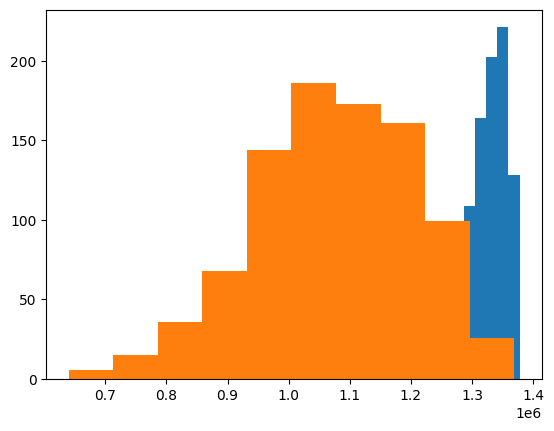

In [30]:
from scipy import stats
import matplotlib.pyplot as plt

df_samedeg = pd.read_excel('../temp/imgsimilarity_binalize250.xlsx', index_col=0)
df_inverse = pd.read_excel('../temp/imgsimilarity_binalize250_inverse.xlsx', index_col=0)

# ヒストグラム
plt.hist(df_samedeg['same_px_cnt'])
plt.hist(df_inverse['same_px_cnt'])

# シャピロウィルク検定のp値
p0 = stats.shapiro(df_samedeg['same_px_cnt'])[1]
p1 = stats.shapiro(df_inverse['same_px_cnt'])[1]
print('samedegのp値: ', p0)
print('inverseのp値: ', p1)

# マン・ホイットニーのU検定 => p<0.01 => 差がある
result = stats.mannwhitneyu(df_samedeg['same_px_cnt'], df_inverse['same_px_cnt'], alternative='two-sided')
print(result)

##### ▶一致ピクセル数の差分を求める => すべてのドローイングにおいて本来の回転角のほうが一致ピクセル数が大きい

6825


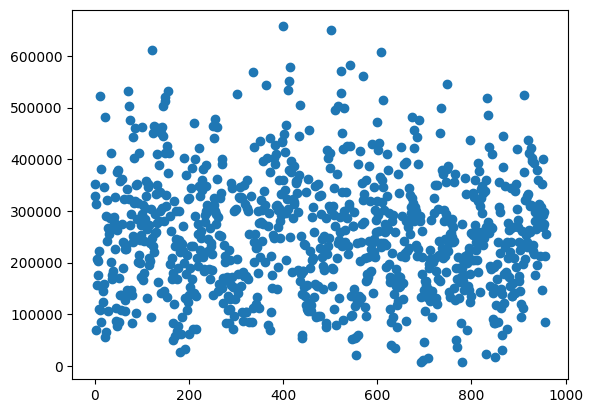

In [37]:
same_px_cnt_sub = [same - inv for same, inv in zip(df_samedeg['same_px_cnt'], df_inverse['same_px_cnt'])]
for item in same_px_cnt_sub:
    if item < 0:
        print(item)
        
plt.scatter(df_asai_target['drawing_id'], same_px_cnt_sub)

print(min(same_px_cnt_sub))